In [5]:
#Imports

import sys
import os
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pdb #python debugger
from timeit import default_timer as timer #timer
from collections import OrderedDict

sys.path.insert(1, '/Users/ryanlopez/ABPTutorial/c++') #Connects to ABP Folder github.com/ryanlopezzzz/ABPTutorial
from cppmd.builder import *
import cppmd as md

import read_data as rd #reads snapshot text data
import MSD #calculates MSD
import directories #used to create directories for saving data

In [88]:
#Directory where all data is saved
save_dir = "/Users/ryanlopez/Desktop/Python_Programs/Dr_Marchetti_Research/Saved_Data"
exp_folder_name = "flocking_transition_vary_Dr_sparse2" #Folder name of experiment directory, don't change inbetween runs unless studying something different
exp_dir = os.path.join(save_dir, exp_folder_name)

D_r_values = []
vicsek_values = []
velocity_values = []

for f in os.scandir(exp_dir): #runs through all immediate subdirectories
    if f.is_dir() and f.path != os.path.join(exp_dir, ".ipynb_checkpoints"):
        run_desc_file = open(os.path.join(f, 'run_desc.json'))
        run_desc = json.loads(run_desc_file.read())
        run_desc_file.close()

        D_r_values.append(run_desc['D_r'])
        vicsek_values.append(run_desc['vicsek_param'])
        velocity_values.append(run_desc['vel_param'])

In [93]:
D_r_values.index(0)

14

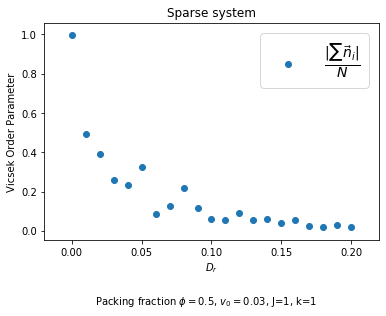

In [90]:
fig, ax = plt.subplots()
ax.scatter(D_r_values, vicsek_values, label = r"$\frac{ \left| \sum \vec{n}_i \right|}{N}$")

ax.set(xlabel=r'$D_r$', ylabel='Vicsek Order Parameter',
       title='Sparse system')
ax.legend(fontsize = 20)

fig.text(.5, -.1, r"Packing fraction $\phi= 0.5$, $v_0=0.03$, J=1, k=1", ha='center')

plt.show()

In [ ]:
load_dir = os.path.join(base_dir, load_folder + "/") #puts base directory in front

run_data_folder_paths = []

for f in os.scandir(load_dir): #runs through all immediate subdirectories of load_dir
    if f.is_dir() and f.path != os.path.join(load_dir, ".ipynb_checkpoints"):
        run_data_folder = os.path.join(f.path, "run_data/") #gives path for run_data of subdirectory
    
        run_data_folder_paths.append(run_data_folder)

beta_values = np.zeros(len(run_data_folder_paths))
time_step_0x = np.zeros(len(run_data_folder_paths))
time_step_1x = np.zeros(len(run_data_folder_paths))
time_step_2x = np.zeros(len(run_data_folder_paths))
time_step_3x = np.zeros(len(run_data_folder_paths))
time_step_4x = np.zeros(len(run_data_folder_paths))

for i, (f) in enumerate(run_data_folder_paths):
    paramfile = open( os.path.join(f, "paramfile.json")  , 'r') #loads json file containing parameters for run
    params = json.loads(paramfile.read()) #params is dictionary containing params for run
    paramfile.close()    
    
    resultsfile = open( os.path.join(f, "resultsfile.json"), 'r')
    results = json.loads(resultsfile.read()) #results is dictionary containing results for run
    resultsfile.close()
    
    beta_values[i] = params['beta'] #gamma_reconstruct
    time_step_0x[i] = results["time_integration_0.00"]
    time_step_1x[i] = results["time_integration_0.25"]
    time_step_2x[i] = results["time_integration_0.50"]
    time_step_3x[i] = results["time_integration_0.75"]
    time_step_4x[i] = results["time_integration_1.00"]
    
index_array = (beta_values).argsort()

beta_values = beta_values[index_array]
time_step_0x = time_step_0x[index_array]
time_step_1x = time_step_1x[index_array]
time_step_2x = time_step_2x[index_array]
time_step_3x = time_step_3x[index_array]
time_step_4x = time_step_4x[index_array]